# Gesundheitsministerium and ECDC Data

## Setup

### Imports

In [6]:
%matplotlib notebook

import logging

from matplotlib import pyplot as plt
from helper import *
logging.basicConfig(level=logging.INFO)
plt.style.use('seaborn-darkgrid')

df_ecdc = ecdc()
logging.info('ECDC: \n%s', df_ecdc.columns)

df_at = at()
logging.info('AT: \n%s', df_at.columns);

INFO:root:ECDC: 
Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')
INFO:root:AT: 
Index(['time', 'tägliche Erkrankungen', 'Timestamp', 'weekday'], dtype='object')


## Comparison - number of cases

<IPython.core.display.Javascript object>


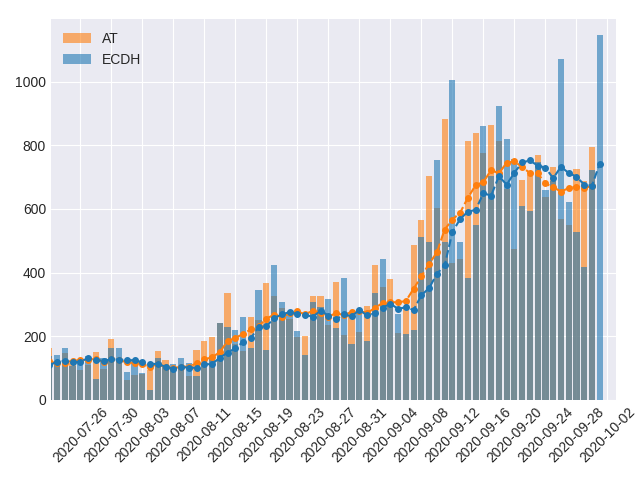

In [8]:
f,ax = plt.subplots()
# ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='recorded',  alpha=0.6, color='C1')

ax.plot(df_at.time, df_at['tägliche Erkrankungen'].rolling(7).mean(),  marker='o', markersize=4, linestyle='--', color='C1')

ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='AT',  alpha=0.6, color='C1')
selection = df_ecdc[df_ecdc.geoId=='AT'].sort_values(by=['year','month','day'], ascending=True)
ax.bar(selection.dateRep, selection['cases'],label='ECDH',  alpha=0.6, color='C0')
ax.plot(selection.dateRep, selection['cases'].rolling(7).mean(), marker='o', markersize=4, linestyle='--',color='C0')
# plt.yscale('log')

ax.xaxis.set_major_locator(plt.MaxNLocator(20));

plt.xticks(rotation=45);
plt.legend(loc='best')
plt.tight_layout()



In [9]:
df_at['tägliche Erkrankungen'].sum(), df_ecdc[df_ecdc.geoId=='AT'].cases.sum()

(45797, 45753)

In [4]:
df_ecdc[df_ecdc.geoId=='AT']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
2470,2020-10-01,1,10,2020,1146,3,Austria,AT,AUT,8858775.0,Europe,116.32533844
2471,2020-09-30,30,9,2020,722,6,Austria,AT,AUT,8858775.0,Europe,111.33593527
2472,2020-09-29,29,9,2020,419,3,Austria,AT,AUT,8858775.0,Europe,112.89371273
2473,2020-09-28,28,9,2020,526,0,Austria,AT,AUT,8858775.0,Europe,114.36118425
2474,2020-09-27,27,9,2020,623,1,Austria,AT,AUT,8858775.0,Europe,112.75825382
...,...,...,...,...,...,...,...,...,...,...,...,...
2741,2020-01-04,4,1,2020,0,0,Austria,AT,AUT,8858775.0,Europe,
2742,2020-01-03,3,1,2020,0,0,Austria,AT,AUT,8858775.0,Europe,
2743,2020-01-02,2,1,2020,0,0,Austria,AT,AUT,8858775.0,Europe,
2744,2020-01-01,1,1,2020,0,0,Austria,AT,AUT,8858775.0,Europe,


In [7]:
df_at.agg(
        {'tägliche Erkrankungen': ['sum', last_7_days_sum,  rolling_avg, latest,  'max' ],
        'time': ['min', 'max']} )


,tägliche Erkrankungen,time
last_7_days_sum,4695.0,NaT
latest,795.0,NaT
max,1065.0,2020-09-30
min,NaN,2020-02-25
rolling_avg,671.0,NaT
sum,45797.0,NaT
